In [45]:
#Bài 1
import pandas as pd

In [46]:
df = pd.read_csv('Data.csv')
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [47]:
df_go = df['Go'].unique()
print(df_go)

['NO' 'YES']


In [48]:
map_value_go = {}
i = 0
for go in df_go:
    new_value = {go:i}
    map_value_go.update(new_value)
    i = i + 1
print(map_value_go)

{'NO': 0, 'YES': 1}


In [49]:
df['Go'] = df['Go'].map(map_value_go)
print(df)

    Age  Experience  Rank Nationality  Go
0    36          10     9          UK   0
1    42          12     4         USA   0
2    23           4     6           N   0
3    52           4     4         USA   0
4    43          21     8         USA   1
5    44          14     5          UK   0
6    66           3     7           N   1
7    35          14     9          UK   1
8    52          13     7           N   1
9    35           5     9           N   1
10   24           3     5         USA   0
11   18           3     7          UK   1
12   45           9     9          UK   1


In [50]:
df_nation = df['Nationality'].unique()
print(df_nation)

['UK' 'USA' 'N']


In [51]:
map_value_nation = {}
i = 0
for nation in df_nation:
    new_value = {nation:i}
    map_value_nation.update(new_value)
    i = i + 1
print(map_value_nation)

{'UK': 0, 'USA': 1, 'N': 2}


In [52]:
df['Nationality'] = df['Nationality'].map(map_value_nation)
print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [53]:
XTrain = df.drop(columns=['Go'])
print(XTrain)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0


In [54]:
YTrain = df['Go']
print(YTrain)


0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(XTrain, YTrain)
from sklearn import tree
text_tree = tree.export_text(dtree)
print(text_tree)

|--- feature_2 <= 6.50
|   |--- class: 0
|--- feature_2 >  6.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 35.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  35.50
|   |   |   |--- feature_1 <= 9.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  9.50
|   |   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

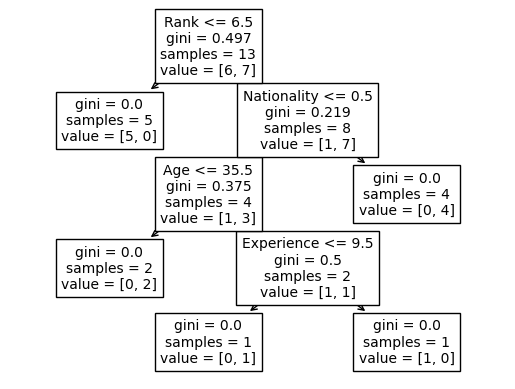

In [56]:
list_cols = list(XTrain.columns)
tree.plot_tree(dtree, feature_names= list_cols)

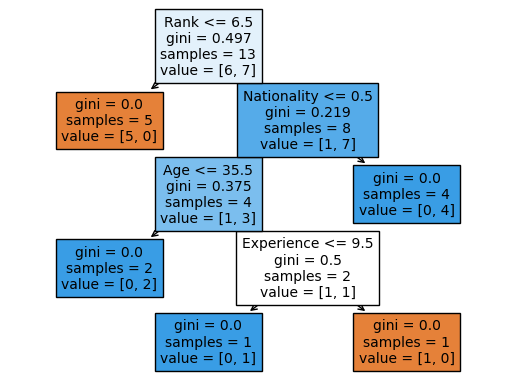

In [57]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(dtree, feature_names = list_cols, filled = True)
plt.savefig('dtree.png', format='png', bbox_inches = 'tight')

In [58]:
y_pred = dtree.predict(XTrain)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(YTrain, y_pred))

Accuracy: 1.0


In [59]:
xTest = [[40,10,7,1]]
ypred = dtree.predict(xTest)
print(ypred)

[1]


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XTrain,YTrain, test_size=0.2, random_state=42)
print(X_train)

    Age  Experience  Rank  Nationality
8    52          13     7            2
5    44          14     5            0
2    23           4     6            2
1    42          12     4            1
12   45           9     9            0
4    43          21     8            1
7    35          14     9            0
10   24           3     5            1
3    52           4     4            1
6    66           3     7            2


In [61]:
dtree = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred = dtree.predict(X_test)
print('X test')
print(X_test)
print('y pred')
print(y_pred)


X test
    Age  Experience  Rank  Nationality
11   18           3     7            0
9    35           5     9            2
0    36          10     9            0
y pred
[1 1 1]


In [62]:
#Bài 2
df = pd.read_csv('weather.csv')
print(df)

     Outlook Temperature Humidity    Wind Class
0      Sunny         Hot     High    Weak    No
1      Sunny         Hot     High  Strong    No
2   Overcast         Hot     High    Weak   Yes
3       Rain        Mild     High    Weak   Yes
4       Rain        Cool   Normal    Weak   Yes
5       Rain        Cool   Normal  Strong    No
6   Overcast        Cool   Normal  Strong   Yes
7      Sunny        Mild     High    Weak    No
8      Sunny        Cool   Normal    Weak   Yes
9       Rain        Mild   Normal    Weak   Yes
10     Sunny        Mild   Normal  Strong   Yes
11  Overcast        Mild     High  Strong   Yes
12  Overcast         Hot   Normal    Weak   Yes
13      Rain        Mild     High  Strong    No


In [63]:
df_outlook = df['Outlook'].unique()
print(df_outlook)
print('')
map_value_outlook = {}
i = 0
for classes in df_outlook:
    new_value = {classes:i}
    map_value_outlook.update(new_value)
    i = i + 1
print(map_value_outlook)
df['Outlook'] = df['Outlook'].map(map_value_outlook)
print(df)

['Sunny' 'Overcast' 'Rain']

{'Sunny': 0, 'Overcast': 1, 'Rain': 2}
    Outlook Temperature Humidity    Wind Class
0         0         Hot     High    Weak    No
1         0         Hot     High  Strong    No
2         1         Hot     High    Weak   Yes
3         2        Mild     High    Weak   Yes
4         2        Cool   Normal    Weak   Yes
5         2        Cool   Normal  Strong    No
6         1        Cool   Normal  Strong   Yes
7         0        Mild     High    Weak    No
8         0        Cool   Normal    Weak   Yes
9         2        Mild   Normal    Weak   Yes
10        0        Mild   Normal  Strong   Yes
11        1        Mild     High  Strong   Yes
12        1         Hot   Normal    Weak   Yes
13        2        Mild     High  Strong    No


In [64]:
df_humid = df['Humidity'].unique()
print(df_humid)
print('')
map_value_humid = {}
i = 0
for humid in df_humid:
    new_value = {humid:i}
    map_value_humid.update(new_value)
    i = i + 1
print(map_value_humid)
df['Humidity'] = df['Humidity'].map(map_value_humid)
print(df)

['High' 'Normal']

{'High': 0, 'Normal': 1}
    Outlook Temperature  Humidity    Wind Class
0         0         Hot         0    Weak    No
1         0         Hot         0  Strong    No
2         1         Hot         0    Weak   Yes
3         2        Mild         0    Weak   Yes
4         2        Cool         1    Weak   Yes
5         2        Cool         1  Strong    No
6         1        Cool         1  Strong   Yes
7         0        Mild         0    Weak    No
8         0        Cool         1    Weak   Yes
9         2        Mild         1    Weak   Yes
10        0        Mild         1  Strong   Yes
11        1        Mild         0  Strong   Yes
12        1         Hot         1    Weak   Yes
13        2        Mild         0  Strong    No


In [65]:
df_wind = df['Wind'].unique()
print(df_wind)
print('')
map_value_wind = {}
i = 0
for wind in df_wind:
    new_value = {wind:i}
    map_value_wind.update(new_value)
    i = i + 1
print(map_value_wind)
df['Wind'] = df['Wind'].map(map_value_wind)
print(df)

['Weak' 'Strong']

{'Weak': 0, 'Strong': 1}
    Outlook Temperature  Humidity  Wind Class
0         0         Hot         0     0    No
1         0         Hot         0     1    No
2         1         Hot         0     0   Yes
3         2        Mild         0     0   Yes
4         2        Cool         1     0   Yes
5         2        Cool         1     1    No
6         1        Cool         1     1   Yes
7         0        Mild         0     0    No
8         0        Cool         1     0   Yes
9         2        Mild         1     0   Yes
10        0        Mild         1     1   Yes
11        1        Mild         0     1   Yes
12        1         Hot         1     0   Yes
13        2        Mild         0     1    No


In [69]:
df_temp = df['Temperature'].unique()
print(df_temp)
print('')
map_value_temp = {}
i = 0
for temp in df_temp:
    new_value = {temp:i}
    map_value_temp.update(new_value)
    i = i + 1
print(map_value_temp)
df['Temperature'] = df['Temperature'].map(map_value_temp)
print(df)

['Hot' 'Mild' 'Cool']

{'Hot': 0, 'Mild': 1, 'Cool': 2}
    Outlook  Temperature  Humidity  Wind  Class
0         0            0         0     0      0
1         0            0         0     1      0
2         1            0         0     0      1
3         2            1         0     0      1
4         2            2         1     0      1
5         2            2         1     1      0
6         1            2         1     1      1
7         0            1         0     0      0
8         0            2         1     0      1
9         2            1         1     0      1
10        0            1         1     1      1
11        1            1         0     1      1
12        1            0         1     0      1
13        2            1         0     1      0


In [66]:
df_class = df['Class'].unique()
print(df_class)

['No' 'Yes']


In [68]:
map_value_class = {}
i = 0
for classes in df_class:
    new_value = {classes:i}
    map_value_class.update(new_value)
    i = i + 1
print(map_value_class)
df['Class'] = df['Class'].map(map_value_class)
print(df)

{'No': 0, 'Yes': 1}
    Outlook Temperature  Humidity  Wind  Class
0         0         Hot         0     0      0
1         0         Hot         0     1      0
2         1         Hot         0     0      1
3         2        Mild         0     0      1
4         2        Cool         1     0      1
5         2        Cool         1     1      0
6         1        Cool         1     1      1
7         0        Mild         0     0      0
8         0        Cool         1     0      1
9         2        Mild         1     0      1
10        0        Mild         1     1      1
11        1        Mild         0     1      1
12        1         Hot         1     0      1
13        2        Mild         0     1      0


In [75]:
XTrain1 = df.drop(columns=['Class'])
print(XTrain)
print('')
YTrain1 = df['Class']
print(YTrain)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier().fit(XTrain1, YTrain1)
from sklearn import tree
text_tree1 = tree.export_text(dtree)
print(text_tree1)

|--- feature_2 <= 6.50
|   |--- class: 0
|--- feature_2 >  6.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 35.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  35.50
|   |   |   |--- feature_0 <= 40.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  40.50
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 1



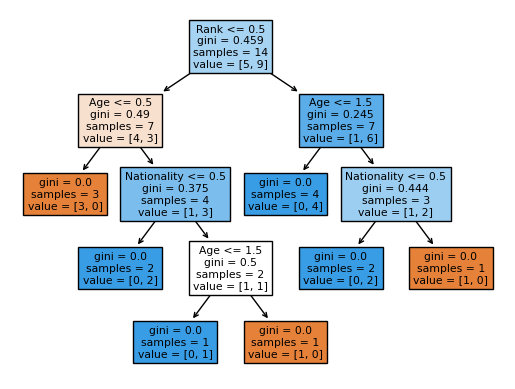

In [77]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(dtree1, feature_names = list_cols, filled = True)
plt.savefig('dtree1.png', format='png', bbox_inches = 'tight')